<a href="https://colab.research.google.com/github/sheikmohdimran/Experiments_2020/blob/master/Vision/FastAI2_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!rm -rf TNBC_NucleiSegmentation* images masks __MACOSX
!wget https://zenodo.org/record/1175282/files/TNBC_NucleiSegmentation.zip
!unzip -q /content/TNBC_NucleiSegmentation.zip
!mkdir -p images masks
!find ./TNBC_NucleiSegmentation -name *.png |grep GT |  xargs mv -t masks/
!find ./TNBC_NucleiSegmentation -name *.png |grep Slide |  xargs mv -t images/

In [0]:
!pip install -q fastai2

In [2]:
from PIL import Image
import numpy as np

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

a=load_image('./masks/01_3.png')
np.unique(a)

array([  0, 255], dtype=int32)

In [0]:
from fastai2.vision.all import *
from pathlib import Path

In [0]:
path = Path('./')
fnames = get_image_files(path/"images")

In [0]:
def label_func(fn): return path/"masks"/f"{fn.stem}{fn.suffix}"

In [0]:
batch_tfms = [IntToFloatTensor(div_mask=255), Normalize.from_stats(*imagenet_stats)]
item_tfms = [ToTensor, RandomResizedCrop(224, min_scale=0.35)]

binary = DataBlock(blocks=(ImageBlock, MaskBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=label_func,
                   #item_tfms=item_tfms,
                   batch_tfms=batch_tfms)

In [0]:
dls = binary.dataloaders('images', bs=2)

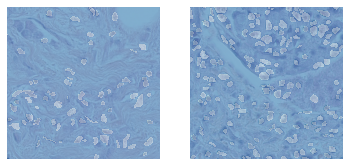

In [8]:
dls.show_batch(max_n=4)#cmap='Blues', vmin=0, vmax=1)

In [0]:
learn = unet_learner(dls, xresnet50,n_out=2)

In [10]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,1.374934,4.488579,00:47


epoch,train_loss,valid_loss,time
0,0.487762,0.272235,00:34
1,0.344027,0.208886,00:32
2,0.268807,0.222592,00:32
3,0.237853,0.204382,00:32
4,0.213834,0.210183,00:32
5,0.192650,0.160598,00:32
6,0.177410,0.159634,00:32
7,0.163975,0.159198,00:32


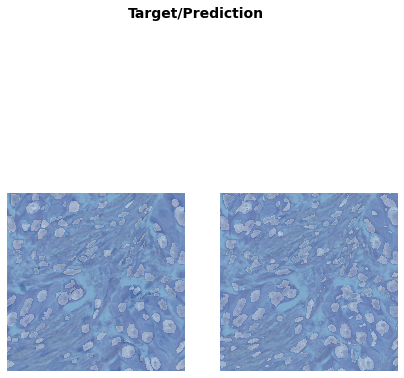

In [11]:
learn.show_results(max_n=4, figsize=(7,8))

### Export and Inference

In [0]:
learn.export()

In [5]:
path = Path('/content/')
path.ls(file_exts='.pkl')

(#1) [Path('/content/export.pkl')]

In [0]:
learn_inf = load_learner(path/'export.pkl')

In [7]:
output_mask = learn_inf.predict('TCGA-18-5592-01Z-00-DX1.png')

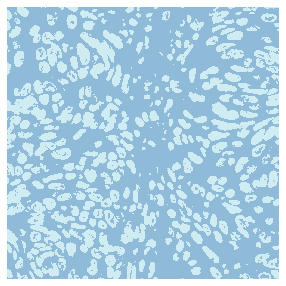

In [8]:
output_mask[0].show(figsize=(5,5))

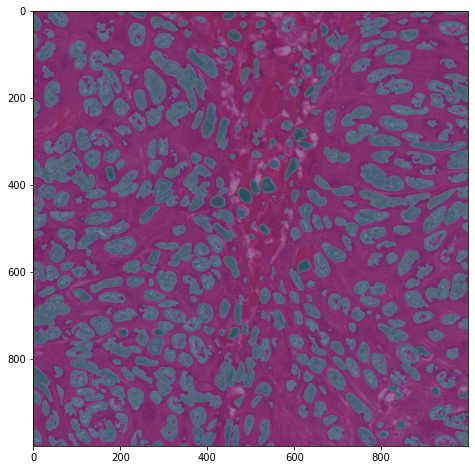

In [13]:
im=Image.open('TCGA-18-5592-01Z-00-DX1.png')
plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(im)
plt.imshow(output_mask[0],vmax=2,vmin=0,alpha=0.5)

torch.Size([224, 224])